In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.decomposition import PCA

In [24]:
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd

In [7]:
genes = ['gene' + str(i) for i in range (1,101)]

In [9]:
wt = ['wt' + str(i) for i in range (1,6)]
ko = ['ko' + str(i) for i in range (1,6)]

In [10]:
df = pd.DataFrame( index= genes, columns = [*wt,*ko])

#### Randomly generating data

In [18]:
for gene in df.index:
    df.loc[gene,'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)
    df.loc[gene,'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)

In [19]:
df.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,700,731,699,733,667,238,242,193,250,236
gene2,180,183,156,213,160,423,454,458,483,437
gene3,648,677,637,658,631,834,832,767,831,828
gene4,109,98,88,97,96,575,611,585,562,620
gene5,347,315,303,328,324,375,382,371,407,404


In [21]:
df.shape

(100, 10)

In [26]:
scaled_data = StandardScaler().fit_transform(df.T)

In [27]:
pca = PCA()

In [28]:
pca.fit(scaled_data)

PCA()

In [29]:
pca_data = pca.transform(scaled_data)

In [37]:
pca.explained_variance_ratio_

array([9.34822282e-01, 1.63603697e-02, 1.46216644e-02, 1.13982635e-02,
       7.26666321e-03, 6.21766747e-03, 3.22228617e-03, 3.13720507e-03,
       2.95359814e-03, 2.62019793e-32])

In [33]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [45]:
per_var

array([93.5,  1.6,  1.5,  1.1,  0.7,  0.6,  0.3,  0.3,  0.3,  0. ])

In [34]:
labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)]

Text(0.5, 1.0, 'Scree plot')

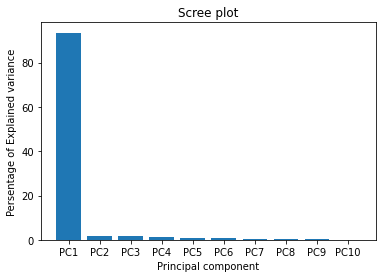

In [36]:
plt.bar(x = range(1,len(per_var)+1),height = per_var,tick_label=labels)
plt.xlabel('Principal component')
plt.ylabel('Persentage of Explained variance')
plt.title('Scree plot')

#### Almost all the variation is in PC1, so a 2-D graph of PC1 and PC2 should do a good job representing the original data.

In [40]:
pca_df = pd.DataFrame(pca_data, index =  [*wt,*ko], columns = labels)

In [41]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.641073,-0.420904,-0.394358,2.439546,0.111946,0.721064,0.186709,0.390313,-0.575791,1.665335e-16
wt2,-9.654573,-0.227000,-1.561308,0.101846,-0.116798,-0.403873,-0.575312,0.328908,1.170926,-4.274359e-15
wt3,-9.767710,0.122151,0.369629,-0.517687,-1.210168,-0.834854,1.184212,-0.218825,0.014138,1.498801e-15
wt4,-9.958502,2.363164,-0.105758,-1.212012,1.292135,0.650160,0.045242,-0.182892,-0.202478,3.219647e-15
wt5,-9.309288,-1.951421,1.694922,-0.843982,-0.085006,-0.127543,-0.852722,-0.289974,-0.419206,6.106227e-16


In [48]:
pca_df.shape

(10, 10)

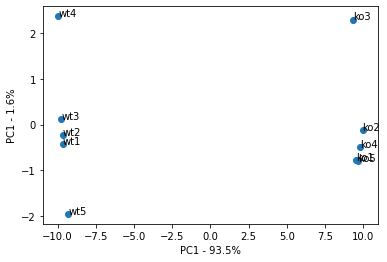

In [47]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()